In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
import keras
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link1 = 'https://drive.google.com/open?id=12PQqDemBZ_XgQSbpFl2F6hXDkqQGTnmf'
fluff, id = link1.split('=')
print(id)

12PQqDemBZ_XgQSbpFl2F6hXDkqQGTnmf


In [0]:
download1 = drive.CreateFile({'id':id})
download1.GetContentFile('photon.hdf5')


In [0]:
import h5py
f = h5py.File('photon.hdf5', 'r')

In [0]:
p_X = f['X']
p_y = f['y']

In [0]:
link2 = 'https://drive.google.com/open?id=1lW1jdrRGAMWcOrma7fqYXJfErk6ah_qS'
fluff, id = link2.split('=')
download2 = drive.CreateFile({'id':id})
download2.GetContentFile('electron.hdf5')

In [0]:
e = h5py.File('electron.hdf5', 'r')
e_X = e['X']
e_y = e['y']

In [0]:
p_X = np.array(p_X)
p_y = np.array(p_y)
e_X = np.array(e_X)
e_y = np.array(e_y)

In [0]:
X_train = np.concatenate((p_X, e_X), axis = 0)
y_train = np.concatenate((p_y, e_y), axis = 0)

In [0]:
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=43)

In [0]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=43)

In [0]:
X_val.shape

(49800, 32, 32, 2)

In [0]:
cnn1 = Sequential([
    Conv2D(8, kernel_size=(5, 5), activation='relu',padding='same',input_shape=(32, 32, 2)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         408       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [0]:
opt = keras.optimizers.Adam(lr=0.001)

In [0]:
cnn1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
history = cnn1.fit(X_train, y_train, batch_size=256, epochs=30, validation_data=(X_val, y_val), shuffle=True)

Train on 348600 samples, validate on 74700 samples
Epoch 1/30
348600/348600 [==============================] - 133s 382us/step - loss: 0.6274 - acc: 0.6504 - val_loss: 0.5936 - val_acc: 0.6923
Epoch 2/30
348600/348600 [==============================] - 133s 382us/step - loss: 0.5872 - acc: 0.6968 - val_loss: 0.5770 - val_acc: 0.7069
Epoch 3/30
348600/348600 [==============================] - 134s 384us/step - loss: 0.5748 - acc: 0.7077 - val_loss: 0.5696 - val_acc: 0.7133
Epoch 4/30
348600/348600 [==============================] - 135s 386us/step - loss: 0.5676 - acc: 0.7134 - val_loss: 0.5683 - val_acc: 0.7122
Epoch 5/30
348600/348600 [==============================] - 136s 390us/step - loss: 0.5638 - acc: 0.7162 - val_loss: 0.5579 - val_acc: 0.7226
Epoch 6/30
348600/348600 [==============================] - 135s 388us/step - loss: 0.5614 - acc: 0.7177 - val_loss: 0.5607 - val_acc: 0.7195
Epoch 7/30
348600/348600 [==============================] - 135s 388us/step - loss: 0.5590 - acc:

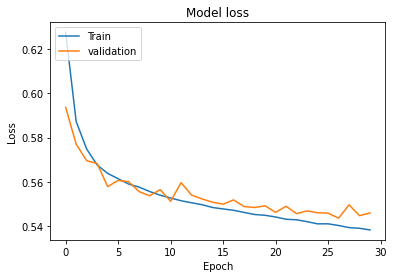

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [0]:
cnn2 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(32, 32, 2)),
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        304       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [0]:
cnn2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
history = cnn2.fit(X_train, y_train, batch_size=256, epochs=30, validation_data=(X_val, y_val), shuffle=True)

Train on 348600 samples, validate on 74700 samples
Epoch 1/30
348600/348600 [==============================] - 323s 926us/step - loss: 0.7011 - acc: 0.5078 - val_loss: 0.6828 - val_acc: 0.5578
Epoch 2/30
348600/348600 [==============================] - 321s 921us/step - loss: 0.6514 - acc: 0.6184 - val_loss: 0.6148 - val_acc: 0.6687
Epoch 3/30
348600/348600 [==============================] - 324s 928us/step - loss: 0.6006 - acc: 0.6827 - val_loss: 0.5874 - val_acc: 0.6972
Epoch 4/30
348600/348600 [==============================] - 324s 929us/step - loss: 0.5833 - acc: 0.6986 - val_loss: 0.5758 - val_acc: 0.7090
Epoch 5/30
348600/348600 [==============================] - 322s 925us/step - loss: 0.5712 - acc: 0.7098 - val_loss: 0.5605 - val_acc: 0.7200
Epoch 6/30
348600/348600 [==============================] - 322s 922us/step - loss: 0.5608 - acc: 0.7187 - val_loss: 0.5625 - val_acc: 0.7198
Epoch 7/30
348600/348600 [==============================] - 321s 922us/step - loss: 0.5562 - acc:

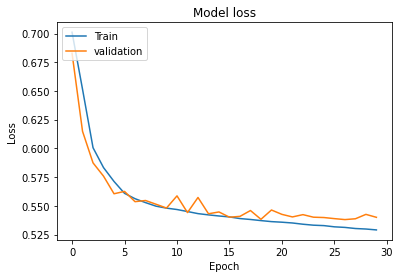

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [0]:
n_classes = 2
y_train2 = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_val2 = keras.utils.np_utils.to_categorical(y_val, n_classes)
y_test2 = keras.utils.np_utils.to_categorical(y_test, n_classes)

In [0]:
cnn3 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(32, 32, 2)),
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
cnn3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        304       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [0]:
history3 = cnn3.fit(X_train, y_train2, batch_size=64, epochs=30, validation_data=(X_val, y_val2), shuffle=True)

Train on 348600 samples, validate on 74700 samples
Epoch 1/30
348600/348600 [==============================] - 389s 1ms/step - loss: 0.6094 - acc: 0.6711 - val_loss: 0.5750 - val_acc: 0.7076
Epoch 2/30
348600/348600 [==============================] - 390s 1ms/step - loss: 0.5706 - acc: 0.7107 - val_loss: 0.5640 - val_acc: 0.7178
Epoch 3/30
348600/348600 [==============================] - 391s 1ms/step - loss: 0.5622 - acc: 0.7179 - val_loss: 0.5603 - val_acc: 0.7218
Epoch 4/30
348600/348600 [==============================] - 391s 1ms/step - loss: 0.5579 - acc: 0.7205 - val_loss: 0.5574 - val_acc: 0.7213
Epoch 5/30
348600/348600 [==============================] - 387s 1ms/step - loss: 0.5548 - acc: 0.7235 - val_loss: 0.5512 - val_acc: 0.7258
Epoch 6/30
348600/348600 [==============================] - 388s 1ms/step - loss: 0.5527 - acc: 0.7245 - val_loss: 0.5519 - val_acc: 0.7259
Epoch 7/30
348600/348600 [==============================] - 391s 1ms/step - loss: 0.5511 - acc: 0.7262 - val_

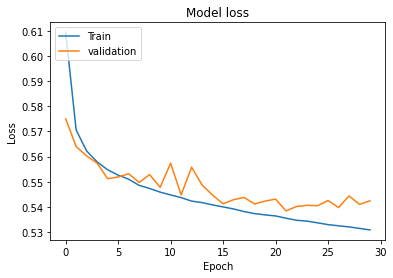

In [0]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [0]:
print(np.max(history3.history['val_acc']))

NameError: ignored

In [0]:
history4 = cnn3.fit(X_train, y_train2, batch_size=256, epochs=30, validation_data=(X_val, y_val2), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 348600 samples, validate on 74700 samples
Epoch 1/30





348600/348600 [==============================] - 321s 922us/step - loss: 0.6371 - acc: 0.6363 - val_loss: 0.6028 - val_acc: 0.6817
Epoch 2/30
348600/348600 [==============================] - 320s 919us/step - loss: 0.5884 - acc: 0.6954 - val_loss: 0.5699 - val_acc: 0.7143
Epoch 3/30
348600/348600 [==============================] - 319s 915us/step - loss: 0.5678 - acc: 0.7139 - val_loss: 0.5618 - val_acc: 0.7175
Epoch 4/30
348600/348600 [==============================] - 320s 918us/step - loss: 0.5594 - acc: 0.7203 - val_loss: 0.5564 - val_acc: 0.7225
Epoch 5/30
348600/348600 [==============================] - 320s 918us/step - loss: 0.5545 - acc: 0.7243 - val_loss: 0.5581 - val_acc: 0.7195
Epoch 6/30
348600/348600 [==============================] - 322s 923us/step - loss: 0.5505 - acc: 0.7271 - val_loss: 0.5481 - val_acc: 0.

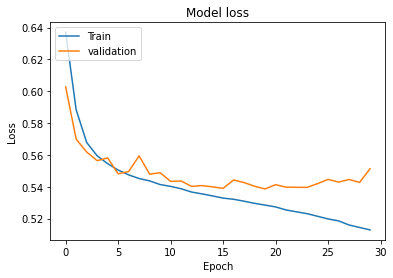

In [0]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

# **Using 1 channel, 1 output neuron.**

In [0]:
X_train1 = np.concatenate((p_X, e_X), axis = 0)
y_train1 = np.concatenate((p_y, e_y), axis = 0)

In [0]:
X_train1 = X_train1[...,0]


In [0]:
X_train1.shape

(498000, 32, 32)

In [0]:
indices = np.arange(X_train1.shape[0])
np.random.shuffle(indices)
X_train1 = X_train1[indices]
y_train1 = y_train1[indices]

In [0]:
X_train1 = X_train1.reshape(-1, 32, 32, 1)

In [0]:
cnn4 = Sequential([
    Conv2D(8, kernel_size=(5, 5), activation='relu',padding='same',input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=43)

In [0]:
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=43)

In [0]:
cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 8)         208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 16)        3216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [0]:
opt4 = keras.optimizers.Adam(lr=5*(10**-4))

In [0]:
cnn4.compile(optimizer=opt4, loss=['binary_crossentropy'], metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history4 = cnn4.fit(x=X_train1, y=y_train1, batch_size=32, epochs=30, validation_data=(X_val1, y_val1), shuffle=True)




Train on 398400 samples, validate on 49800 samples
Epoch 1/30





398400/398400 [==============================] - 96s 240us/step - loss: 0.6020 - acc: 0.6808 - val_loss: 0.5729 - val_acc: 0.7138
Epoch 2/30
398400/398400 [==============================] - 83s 208us/step - loss: 0.5735 - acc: 0.7105 - val_loss: 0.5706 - val_acc: 0.7110
Epoch 3/30
398400/398400 [==============================] - 83s 208us/step - loss: 0.5667 - acc: 0.7157 - val_loss: 0.5622 - val_acc: 0.7189
Epoch 4/30
398400/398400 [==============================] - 84s 210us/step - loss: 0.5613 - acc: 0.7191 - val_loss: 0.5637 - val_acc: 0.7175
Epoch 5/30
398400/398400 [==============================] - 83s 208us/step - loss: 0.5578 - acc: 0.7214 - val_loss: 0.5535 - val_acc: 0.7243
Epoch 6/30
398400/398400 [==============================] - 83s 209us/step - loss: 0.5540 - acc: 0.7240 - val_loss: 0.5542 - val_acc: 0.7246
Epoch 7/30
398400/398400 [==============================] - 83s 209us/step - loss: 0.5518 - acc

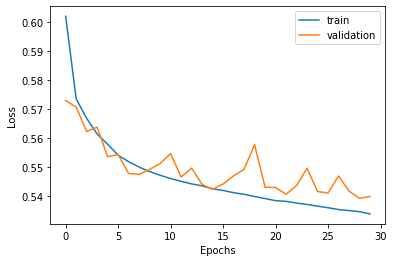

In [0]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [0]:
y_pred = cnn4.predict(X_test1)

# ROC Curve

<function matplotlib.pyplot.show>

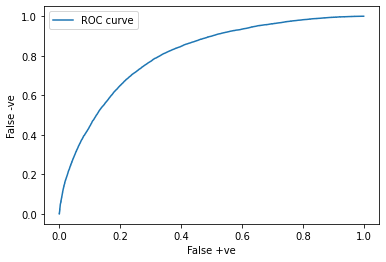

In [0]:
fpr, tpr, _ = roc_curve(y_test1, y_pred)
plt.plot(fpr, tpr,label='ROC curve')
plt.xlabel('False +ve')
plt.ylabel('False -ve')
plt.legend()
plt.show

# ROC Area Under Curve

In [0]:
roc = roc_auc_score(y_test1, y_pred)
print(roc)

0.806531027400486


In [0]:
with open('./cnn4.pkl', 'wb') as model_pkl:
  pickle.dump(cnn4, model_pkl)

In [0]:
X_test1.reshape(-1, X_test1.shape[1]*X_test1.shape[2]).shape

(49800, 1024)

In [0]:
np.savetxt('X_test.csv', X_test1.reshape(-1,X_test1.shape[1]*X_test1.shape[2]), delimiter=',')
np.savetxt('y_test.csv', y_test1, delimiter=',')